In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
pd.options.mode.chained_assignment = None

# I. Introduction
--------------
June 5th, 1963 was the first year that the NHL held a draft which was called the NHL amateur draft. At this point, there were only the original six teams in the league, the Boston Bruins, Montreal Canadiens, New York Rangers, Detroit Red Wings, Toronto Maple Leafs, and the Chicago Blackhawks. At this time the it was mostly Canadians and Americans in the league.

Slava Fetisov was a part of the 1980 Soviet Union Olympic Gold medal team, and was regarded as one of the best defensemen in hockey history.  He, along with many other Russian born players were drafted in 1978, however due to the communist regime and the regiment the Soviet hockey players were expected to follow, he was not allowed to leave Russia. Throughout the mid-late 1980s Soviet athletes began to protest these restrictions, and finally in 1989, Slava was one of the first Russians to be in the NHL. By the mid 90’s the five Russians in the NHL were not only all on the Detroit Redwings, but they played on the same line. The Russian five, as they were called, helped carry the Detroit Redwings to a Stanley Cup victory in the 1997-1998 season. The reason that this line had such an impact on the league is because they brought a different style of hockey to North America. Europeans play on a rink significantly wider than in the U.S., which favors a more skillful and fast game. For instance, rather than the traditional “dump-and-chase” play taught to every kid playing hockey in the U.S., the Russians would instead, hold on to the puck, and regroup until they could get a clean entrance into the opponent’s zone. 

The 1980s-90s in the NHL was the era of the "Big Bad Bruins". Teams were large and would scare opponents by having enforcers and attacking other teams best players. These so called enforcers were meant to protect the star players such as the Bruins Bobby Orr. Enforcers have slolwy become obsolete in the game, while coaches are prioritizing highly skilled and fast players.

To see how the game of hockey in the NHL has changed over time, we looked at the weight and height of first round draft picks, as well as the country of birth, shot percentages, and points per game. Additionally we also examined whether style has changed depending on a players position.

**Hypothesis:**
 Our hypothesis is that the top draft pics each year have been on average, lighter and shorter than they have been in the past. We also expect that the number of points per game as well as shot percentage for top draft players has increased.
 
**Main Findings:**
Our main findings from this project were that there is significant evidence that the first round picks have dramatically changed over time. Leading up until 1998, players were getting heavier and taller, and from 1998 to 2019, the players were getting lighter and shorter. The data that we found is significant and implies that there has been a change in the style of play. <br><br>
Moreover, the players were found to be drafted increasing perentage from European countries while the percentage for draftees from Non-European countries was decreasing over the last few decades. This again points towards the conclusion of the influence of the European play style influence on the NHL. 

# II. Data Description
--------------

We began by indexing every team in the NHL from the official NHL website, and then scraping the web pages from the official website. The data, in its original form, was through javascript calls, which loaded after the initial HTML page loaded. This prompted us to use the selenium scraping library, which allowed us to pull data after all of the scripts have been run. Once we were able to gather all of the draft picks, we completed a second round of scraping to get player data from each player's individual page. Overall, the scraping process took around an hour to execute (we didn't want to overload the servers).

The NHL website definitely experienced additional server load, and there is a good chance they were aware of it. The site, is however, designed specifically for individuals to look at data, and during a time of no sports, I'm sure that the official NHL team would appreciate this usage. 

The dataset head can be viewed below. The column headers are all attributes for each player (row). The attributes are a combination of physical data, personal data, and playstyle data. This dataset was created so that we could gather a significant data from every draft pick since the first year, 1963.

One instantly noticable feature about the dataset is the large amount of NaN values for earlier years. Many records from the 1960's were unobtainable/not recorded. In our planned analysis, however, we plan to use separate pieces of the dataset, so filtering out NaN columns is not proper for the first CSV file generation. The large quantity of NaN in the dataset head is not indicative of the entire set.

The raw data can be found at https://records.nhl.com, and the scraping scripts we wrote are in this root github directory as well, under the file name Data_Collection_And_Clean.ipynb

At the time of our first data entry, 1963 draft, there were only 6 picks in the first round because there were only 6 teams. We decided to record only the first 6 picks because we strictly wanted to capture roughly the top 20% of players to get a better understanding of what type of players teams priortize. There is a big difference between a first-round pick and a second-round pick because a second-round pick was not the team’s 2nd choice, but rather it was their >31 choice. Although the there were only six teams in 1963, this figure grew to 14 teams by 1970, 21 teams by 1980, and 31 teams by 2018, with the induction of the Las Vegas Golden Knights. 

In [2]:
draft_data = pd.read_csv("draft.csv")
draft_data.head()

,Unnamed: 0,Name,Team,Pick,Position,Country,Height,Weight,Year,Shoots,...,Power-Play-Goals,Power-Play-Points,Short-Handed-Goals,Short-Handed-Points,Game-Winning-Goals,Overtime-Goals,Shots,Shot-Percentage,Face-Off-Win-Percent,Shot-Perctange
0,0,Garry Monahan,Montréal Canadiens,1,LW,CAN,"6' 0""",199.0,1963,Left,...,15.0,33.0,6.0,14.0,17.0,0.0,"1,305",NaN,--,8.9
1,1,Peter Mahovlich,Detroit Red Wings,2,C,CAN,"6' 5""",210.0,1963,Left,...,72.0,202.0,19.0,25.0,38.0,0.0,"2,089",NaN,--,13.8
2,2,Orest Romashyna,Boston Bruins,3,LW,DEU,"5' 10""",170.0,1963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Al Osborne,New York Rangers,4,RW,CAN,"6' 0""",180.0,1963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Art Hampson,Chicago Blackhawks,5,D,CAN,NaN,NaN,1963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# III. Data Analysis
--------------


In [3]:
#Only execute once or else type error after "Height" column is updated
#Change "Height" column to from (feet)' (inches)" to Inches
#replace null elements with an empty string
draft_data.fillna('', inplace = True)
def parse_ht(ht):
    if len(ht) == 0:
        return ''
    else:
        ht_ = ht.split("' ")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return int((12*ft_) + in_)

height_in = draft_data["Height"].apply(lambda x:parse_ht(x))
height_in = height_in.to_frame()
extract = height_in["Height"]

In [4]:
draft_data["Height"] = extract.values
draft_data.head()
#indexNames = draft_data[ draft_data['Height'] == '' ].index

#draft_data.drop(indexNames, inplace=True)


,Unnamed: 0,Name,Team,Pick,Position,Country,Height,Weight,Year,Shoots,...,Power-Play-Goals,Power-Play-Points,Short-Handed-Goals,Short-Handed-Points,Game-Winning-Goals,Overtime-Goals,Shots,Shot-Percentage,Face-Off-Win-Percent,Shot-Perctange
0,0,Garry Monahan,Montréal Canadiens,1,LW,CAN,72,199,1963,Left,...,15,33,6,14,17,0,"1,305",,--,8.9
1,1,Peter Mahovlich,Detroit Red Wings,2,C,CAN,77,210,1963,Left,...,72,202,19,25,38,0,"2,089",,--,13.8
2,2,Orest Romashyna,Boston Bruins,3,LW,DEU,70,170,1963,,...,,,,,,,,,,
3,3,Al Osborne,New York Rangers,4,RW,CAN,72,180,1963,,...,,,,,,,,,,
4,4,Art Hampson,Chicago Blackhawks,5,D,CAN,,,1963,,...,,,,,,,,,,


In [5]:
#creating a dataframe where players without height and weight values are deleted.
#This doesnt effect our data much because the difference is only 3 players
draft_hw_filtered = draft_data.loc[draft_data["Height"] !='']
print("Mean height of first round NHLers (1963 - 2019):",draft_hw_filtered["Height"].mean(),"inches")
print("Mean weight of first round NHLers (1963 - 2019):", draft_hw_filtered["Weight"].mean(),"pounds")
print("Standard deviation of height first round NHLers (1963 - 2019):", round(draft_hw_filtered["Height"].std()), "inches")
print("Standard deviation of weight first round NHLers (1963 - 2019):", round(draft_hw_filtered["Weight"].std()), "pounds")
print("Variance of height first round NHLers (1963 - 2019):", round(draft_hw_filtered["Height"].var()), "pound")
print("Variance of weight first round NHLers (1963 - 2019):", round(draft_hw_filtered["Weight"].var()), "pound")
print()
print("Mean height 1963:", draft_hw_filtered.loc[draft_hw_filtered["Year"] == 1963]["Height"].mean())
print("Mean weight 1963:", draft_hw_filtered.loc[draft_hw_filtered["Year"] == 1963]["Weight"].mean())
print("Mean height 2019:", draft_hw_filtered.loc[draft_hw_filtered["Year"] == 2019]["Height"].mean())
print("Mean weight 2019:", draft_hw_filtered.loc[draft_hw_filtered["Year"] == 2019]["Weight"].mean())

Mean height of first round NHLers (1963 - 2019): 73.16266460108443 inches
Mean weight of first round NHLers (1963 - 2019): 198.24554608830363 pounds
Standard deviation of height first round NHLers (1963 - 2019): 2.0 inches
Standard deviation of weight first round NHLers (1963 - 2019): 16.0 pounds
Variance of height first round NHLers (1963 - 2019): 4.0 pound
Variance of weight first round NHLers (1963 - 2019): 271.0 pound

Mean height 1963: 73.0
Mean weight 1963: 190.8
Mean height 2019: 72.38709677419355
Mean weight 2019: 187.0


**Initial thoughts**

The overall mean height is around 6'1". In 1963 the, first year that the NHL held a draft, the mean height was 6'1", and in 2019 it was ~5' 10". We wouldnt expect significant disparities due to the fact that there is less variability in height than in weight. As seen above the standard deviation of height and weight is 2.0 inches and 16.0 pounds respectively.  

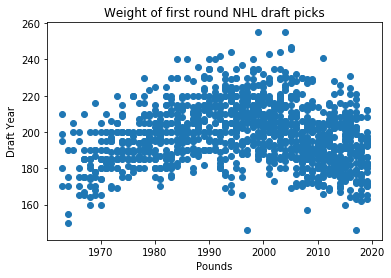

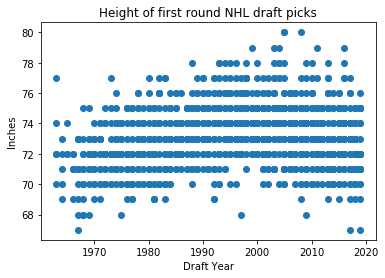

In [6]:
Weight = draft_hw_filtered["Weight"]
Year = draft_hw_filtered["Year"]
Height = draft_hw_filtered["Height"]
plt.scatter(Year,Weight)
plt.title("Weight of first round NHL draft picks")
plt.xlabel("Pounds")
plt.ylabel("Draft Year")
plt.show()

plt.scatter(Year, Height)
plt.title("Height of first round NHL draft picks")
plt.xlabel("Draft Year")
plt.ylabel("Inches")
plt.show()


While this graph is very messy, the immediate pattern that we see is an arrow pointing up, where there is a high concetration of heavier players around 2000. From 1963 - 2000 there seems to be a positive trend while potentially a negative trend from 2000-2019. There seems to be a similar trend in height, however less variance. 

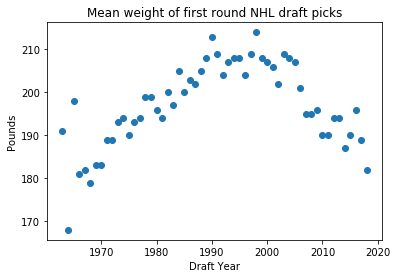

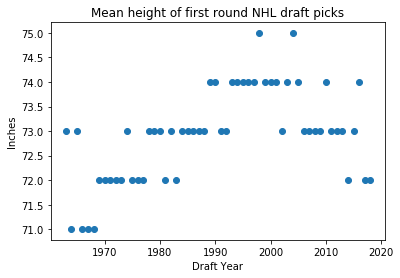

In [7]:
column_names = ["Draft Year", "Mean Weight", "Mean Height"]
Means = pd.DataFrame(columns = column_names)


for x in range (1963,2019):
    Means = Means.append({'Draft Year': int(x), 'Mean Weight': round(draft_hw_filtered.loc[draft_hw_filtered["Year"] == x]["Weight"].mean()),'Mean Height': round(draft_hw_filtered.loc[draft_hw_filtered["Year"] == x]["Height"].mean())}, ignore_index =True)

MeanWeight = Means["Mean Weight"]
MeanHeight = Means["Mean Height"]
MeanYear = Means["Draft Year"]
plt.scatter(MeanYear, MeanWeight)
plt.title("Mean weight of first round NHL draft picks")
plt.xlabel("Draft Year")
plt.ylabel("Pounds")
plt.show()
plt.scatter(MeanYear, MeanHeight)
plt.title("Mean height of first round NHL draft picks")
plt.xlabel("Draft Year")
plt.ylabel("Inches")
plt.show()

In [8]:
#Find the year with the highest mean weight and mean height
print(Means.idxmax())
print(Means.iloc[[35]])

Draft Year     55
Mean Weight    35
Mean Height    35
dtype: int64
    Draft Year  Mean Weight  Mean Height
35      1998.0        214.0         75.0


These two scatter pltots above represent the mean height and mean weight for each draft year. In these graphs we can more clearly see that there seems to be a positive trend to a certain point, and then the trend turns negative. Based on this graph, the pinnacle of "enforcer" hockey (building a team of the biggest/meanest guys) was in the draft year 1998 when the mean weight was 214lbs, and the mean height was 6' 2.5". The maximum for mean height and weight occured in the same year. Simply based on visual speculation, we can assume that a linear model would not fit well over the course of the entire period (1963-2019), therefore we will run two seperate regressions. The first one from 1963-1998 and the second one from 1998-2019.

### Looking at Potential Influences - Country Data

The next step was to look for potential correlations that could hint at a cause in these trends. Over the years, it is known that hockey has had an increased european/international influence, so we wanted to see if we could visualize that. 

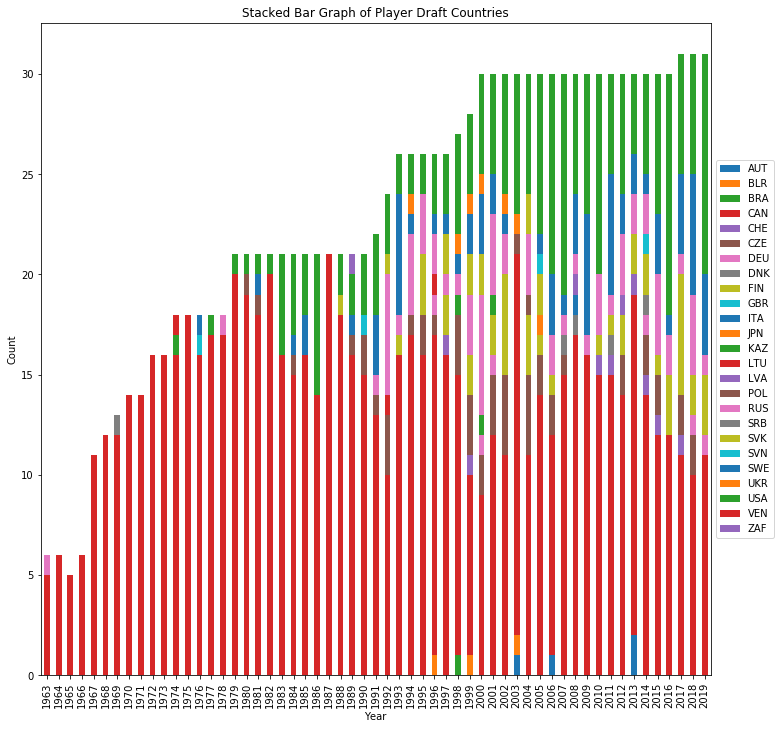

In [9]:
data = draft_data.pivot_table(index=['Year'], columns='Country', aggfunc='size', fill_value=0)
graph = data.plot.bar(stacked=True, figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Stacked Bar Graph of Player Draft Countries")
plt.show()

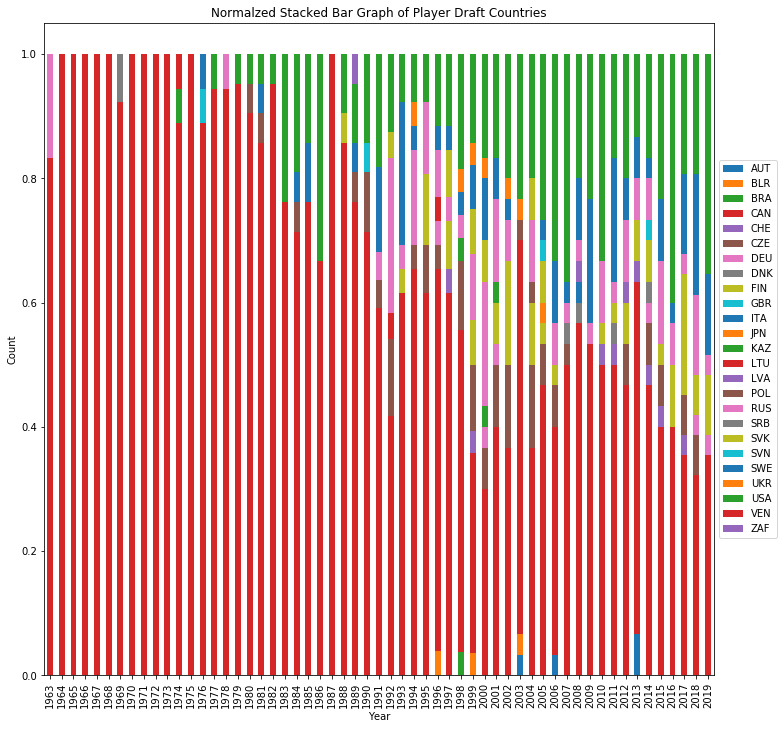

In [10]:
normal_data = data.div(data.sum(axis=1), axis=0)
normal_data.plot.bar(stacked=True, figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Normalzed Stacked Bar Graph of Player Draft Countries")
plt.show()

### Looking at Potential Influences - Playstyle Data

In both the normalized and net count charts, you can see the european influence bleeding in, most noticable in the middle sections with the high frequency of smaller countries taking up a few spots in the draft. 

Next, we decided to look at playstyle as well, through average shots and points by positions. A correlation here could also hint towards a major shift in playstyles through draft picks.

In [11]:
# Cleaning data, removing nulls, str numbers to float
playstyle_data = draft_data[draft_data['Goals'].notnull() & draft_data['Assists'].notnull() & draft_data['Shots'].notnull() & draft_data['Shot-Perctange'].notnull() & draft_data['Games-Played'].notnull()]
playstyle_data = playstyle_data.drop(['Team', 'Height', 'Weight', 'Shot-Percentage', 'Face-Off-Win-Percent', 'Overtime-Goals', 'Power-Play-Points', 'Power-Play-Goals', 'Short-Handed-Goals', 'Name', 'Penalty-Mins', 'Game-Winning-Goals', 'Short-Handed-Points', 'Plus-Minus', 'Country'], axis=1)
playstyle_data['Shots'] = playstyle_data['Shots'].str.replace(',','', regex=True)
playstyle_data['Games-Played'] = playstyle_data['Games-Played'].str.replace(',','', regex=True)

playstyle_data['Shots'] = pd.to_numeric(playstyle_data['Shots'])
playstyle_data['Games-Played'] = pd.to_numeric(playstyle_data['Games-Played'])
playstyle_data['Shots-Per-Game'] = playstyle_data['Shots'] / playstyle_data['Games-Played']
playstyle_data['Points-Per-Game'] = playstyle_data['Points'] / playstyle_data['Games-Played']

#now creating a df for means of the data
column_names = ["Year", "Mean-Shots", "Mean-Shots-Defenders", "Mean-Shots-Forwards", "Mean-Points", "Mean-Points-Defenders", "Mean-Points-Forwards"]
playstyle_means = pd.DataFrame(columns = column_names)

for x in range (1963,2019):
    playstyle_means = playstyle_means.append({'Year': x, \
                                             'Mean-Shots': playstyle_data.loc[playstyle_data["Year"] == x]["Shots-Per-Game"].mean(), \
                                             'Mean-Shots-Defenders': playstyle_data.loc[(playstyle_data["Year"] == x) & (playstyle_data['Position'] == 'D')]["Shots-Per-Game"].mean(), \
                                             'Mean-Shots-Forwards': playstyle_data.loc[(playstyle_data["Year"] == x) & (playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW']))]["Shots-Per-Game"].mean(), \
                                             'Mean-Points': playstyle_data.loc[playstyle_data["Year"] == x]["Points-Per-Game"].mean(), \
                                             'Mean-Points-Defenders': playstyle_data.loc[(playstyle_data["Year"] == x) & (playstyle_data['Position'] == 'D')]["Points-Per-Game"].mean(), \
                                             'Mean-Points-Forwards': playstyle_data.loc[(playstyle_data["Year"] == x) & (playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW']))]["Points-Per-Game"].mean(), \
                                             }, ignore_index=True)

playstyle_means.head()

,Year,Mean-Shots,Mean-Shots-Defenders,Mean-Shots-Forwards,Mean-Points,Mean-Points-Defenders,Mean-Points-Forwards
0,1963.0,1.940133,NaN,1.940133,0.630332,NaN,0.630332
1,1964.0,0.666667,NaN,0.666667,0.333333,NaN,0.333333
2,1965.0,0.882353,0.882353,NaN,0.178151,0.178151,NaN
3,1966.0,1.555059,2.114408,1.182160,0.387171,0.579429,0.258999
4,1967.0,2.622517,NaN,2.622517,0.652318,NaN,0.652318


The mean data was generated as * per game, because overall each player has played for a different amount of games, are currently at different stages in their career, and could likely get lesser game time in their initial years. 

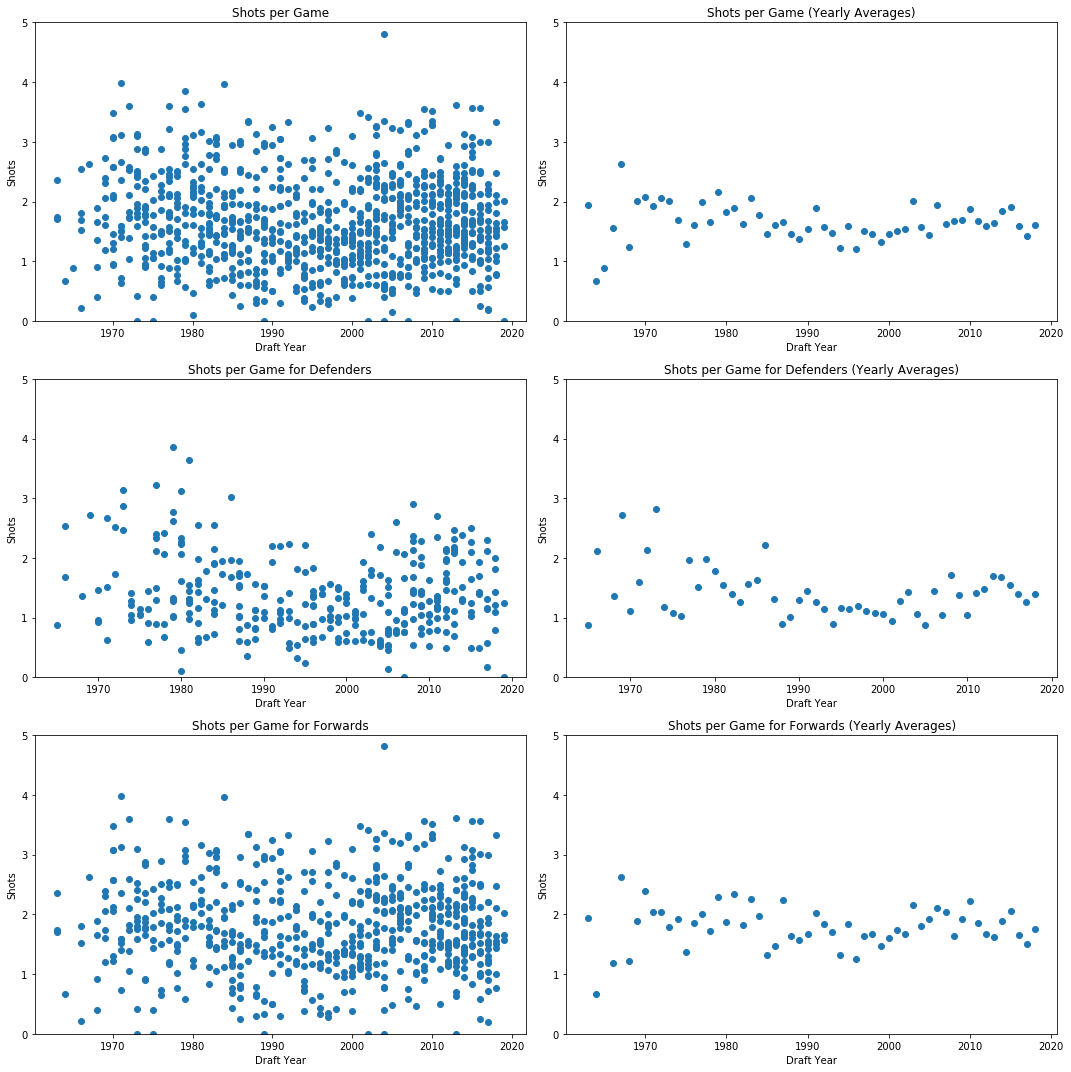

In [12]:
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(playstyle_data['Year'], playstyle_data['Shots-Per-Game'])
plt.ylim(0, 5)
plt.title("Shots per Game")
plt.xlabel("Draft Year")
plt.ylabel("Shots")

plt.subplot(3,2,2)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Shots'])
plt.ylim(0, 5)
plt.title("Shots per Game (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Shots")

plt.subplot(3,2,3)
plt.scatter(playstyle_data.loc[playstyle_data['Position'] == 'D']['Year'], playstyle_data.loc[playstyle_data['Position'] == 'D']['Shots-Per-Game'])
plt.ylim(0, 5)
plt.title("Shots per Game for Defenders")
plt.xlabel("Draft Year")
plt.ylabel("Shots")

plt.subplot(3,2,4)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Shots-Defenders'])
plt.ylim(0, 5)
plt.title("Shots per Game for Defenders (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Shots")

plt.subplot(3,2,5)
plt.scatter(playstyle_data.loc[playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW'])]['Year'], playstyle_data.loc[playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW'])]['Shots-Per-Game'])
plt.ylim(0, 5)
plt.title("Shots per Game for Forwards")
plt.xlabel("Draft Year")
plt.ylabel("Shots")

plt.subplot(3,2,6)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Shots-Forwards'])
plt.ylim(0, 5)
plt.title("Shots per Game for Forwards (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Shots")
plt.tight_layout()
plt.show()

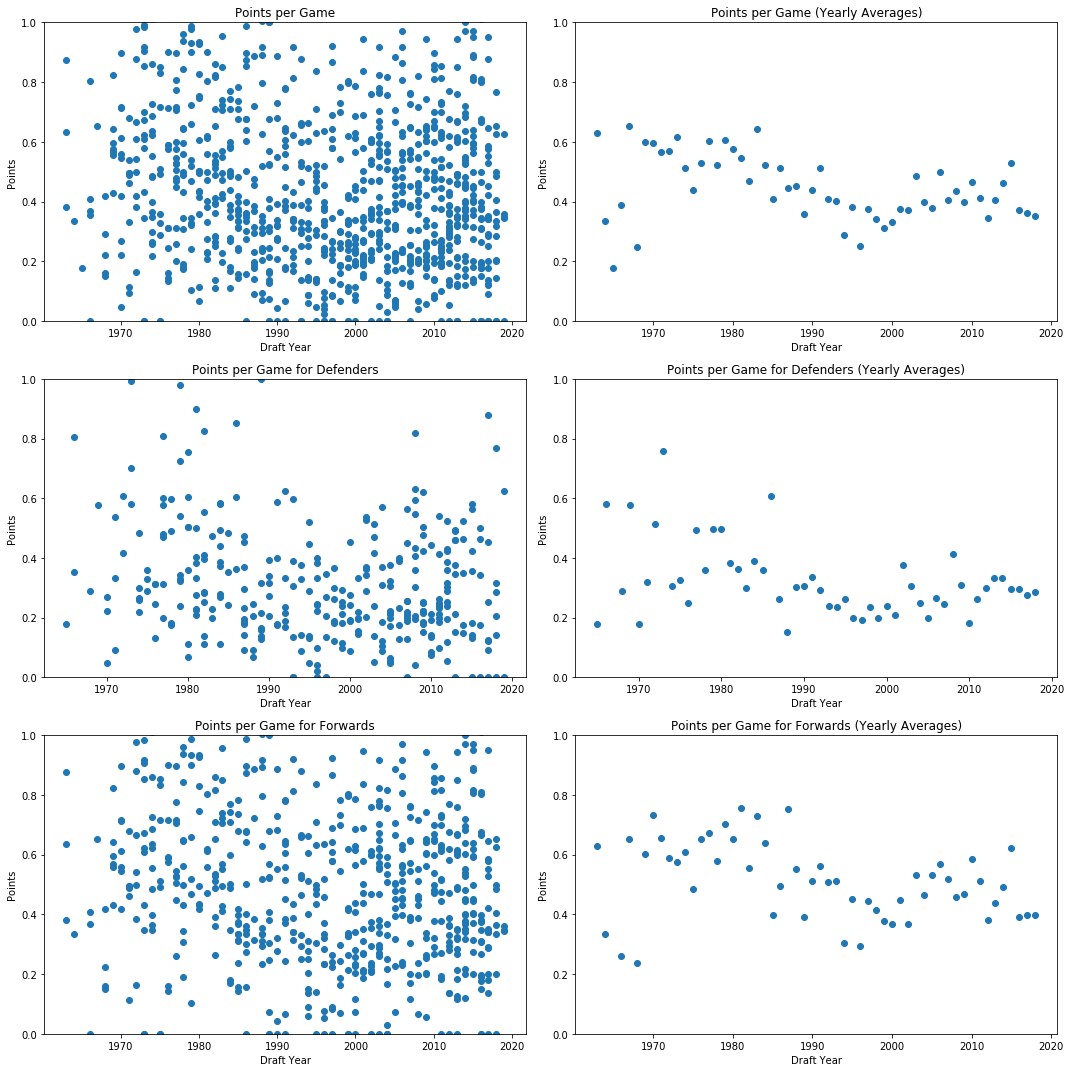

In [13]:
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(playstyle_data['Year'], playstyle_data['Points-Per-Game'])
plt.ylim(0, 1)
plt.title("Points per Game")
plt.xlabel("Draft Year")
plt.ylabel("Points")

plt.subplot(3,2,2)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Points'])
plt.ylim(0, 1)
plt.title("Points per Game (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Points")

plt.subplot(3,2,3)
plt.scatter(playstyle_data.loc[playstyle_data['Position'] == 'D']['Year'], playstyle_data.loc[playstyle_data['Position'] == 'D']['Points-Per-Game'])
plt.ylim(0, 1)
plt.title("Points per Game for Defenders")
plt.xlabel("Draft Year")
plt.ylabel("Points")

plt.subplot(3,2,4)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Points-Defenders'])
plt.ylim(0, 1)
plt.title("Points per Game for Defenders (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Points")

plt.subplot(3,2,5)
plt.scatter(playstyle_data.loc[playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW'])]['Year'], playstyle_data.loc[playstyle_data['Position'].isin(['F', 'C', 'LW', 'RW', 'C/LW', 'C/RW', 'LW/RW'])]['Points-Per-Game'])
plt.ylim(0, 1)
plt.title("Points per Game for Forwards")
plt.xlabel("Draft Year")
plt.ylabel("Points")


plt.subplot(3,2,6)
plt.scatter(playstyle_means['Year'], playstyle_means['Mean-Points-Forwards'])
plt.ylim(0, 1.0)
plt.title("Points per Game for Forwards (Yearly Averages)")
plt.xlabel("Draft Year")
plt.ylabel("Points")
plt.tight_layout()
plt.show()

In these multiple charts, average data is plotted, and then divided by positioning. The idea here was to see if the playstyle has changed, where defenders could potentially be taking more shots and scoring more points, or if forwards could be scoring less points. Furthermore, the overall trend of all the draft pick players was observed. Next, to parallel the height and weight data, we looked at trends after 1998, to see if the downtrend in height and weight and increased foreign influence may have correlated with playstyle.

# IV. Evaluation of Significance
--------------

## Evaluation of Significance - Weight Data

To understand whether the trends seen are due to random chance, we conduct a hypothesis test and calculate linear regression coefficients. These results whill help us understand gain better insight to how the game of hockey has changed over time. 

In [14]:
#get a dataframe of draft picks before and after 1998
before_98 = draft_hw_filtered.loc[draft_hw_filtered["Year"] < 1998]
after_98 = draft_hw_filtered.loc[draft_hw_filtered["Year"] >= 1998]
print("before 98")
year_b = np.array(before_98["Year"]).reshape(-1,1)
weight_b = np.array(before_98["Weight"]).reshape(-1,1)
height_b = np.array(before_98["Height"]).reshape(-1,1)
weight_model_b = LinearRegression().fit(year_b,weight_b)
slope=float(weight_model_b.coef_)
print("slope:",slope)

r_sq_b = float(weight_model_b.score(year_b,weight_b))
print("R sqaured value:", r_sq_b)
print()
print("After 98")
year_a = np.array(after_98["Year"]).reshape(-1,1)
weight_a = np.array(after_98["Weight"]).reshape(-1,1)
height_a = np.array(after_98["Height"]).reshape(-1,1)
weight_model_a = LinearRegression().fit(year_a,weight_a)
slope_a=float(weight_model_a.coef_)
print("slope:",slope_a)
r_sq_a = float(weight_model_a.score(year_a,weight_a))
print("R sqaured value:", r_sq_a)
#corr = np.corrcoef(before_98["Weight"],before_98["Year"])
#rint(corr[0][1])

before 98
slope: 0.8608733833911826
R sqaured value: 0.24084482412879427

After 98
slope: -1.2311068526400917
R sqaured value: 0.21543328860427735


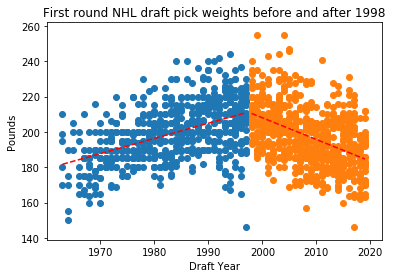

Before 98' y=0.860873x+(-1508.202929)
After 98' y=-1.231107x+(2670.269690)


In [15]:
x = np.array(before_98["Year"], dtype = 'float')
y = np.array(before_98['Weight'], dtype = 'float')
plt.scatter(x,y)

z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


a = np.array(after_98['Year'], dtype = 'float')
b = np.array(after_98['Weight'], dtype = 'float')
plt.scatter(a,b)
q = np.polyfit(a, b,1)
n = np.poly1d(q)
plt.plot(a,n(a),"r--")

plt.title("First round NHL draft pick weights before and after 1998")
plt.xlabel("Draft Year")
plt.ylabel("Pounds")
plt.show()
print("Before 98'","y=%.6fx+(%.6f)"%(z[0],z[1]))
print("After 98'","y=%.6fx+(%.6f)"%(q[0],q[1]))

While the r-squared value is only ~25 percent for both models, before and after 1998, however we believe that this is still a good model. Our slope shows a considerable decrease in the mean of player weight over a long period of time, and our p-value is significant meaning the data is not explained by random chance. There is however high variance in player weight simply due to physiological events. Given the high variation each year it is not surprising that our coefficient of determination is low. As seen in our analysis above the variance for weight in our dataset is 271 pounds.

## Weight hypothesis test

We conducted a hypothesis test for weight to see if the trends are due to random chance. We ommited height from this test because there was less variability and thus less interesting in regards to how the style of play has changed. 

**Null Hypothesis (Ho):** The trends seen in the height and wieght of first round NHL draft picks are due to random chance.

**Alternative (Ha):** The trends seen in the height and weight of first round draft picks are not due to random chance, and there is infact a shift in the way teams prioritize players.  


In [16]:
#1291 rows so we will generate 1291 random values between the minumum and maximum weight.
print("Min Weight:",draft_hw_filtered["Weight"].min())
print("Max Weight:",draft_hw_filtered["Weight"].max())

Min Weight: 146.0
Max Weight: 255.0


In [17]:
rand = np.random.randint(146,255,1291)
rand_weight = rand.reshape(-1,1)
#compare 2 samples
stat, p = ttest_ind(Weight, rand_weight)
print('Statistics =%.3f, p-value=%.3f'%(stat,p))

#interpret
alpha = 0.05
if p > alpha:
    print('Similar distributions (fail to reject Ho)')
else:
    print('Different distributions (reject Ho)')


Statistics =-2.366, p-value=0.018
Different distributions (reject Ho)


Based on the above statistical significance test,we calculated a p-value below is below our alpha of 0.05. With a 95% confidence interval, the trends seen in the weight of first round NHL picks has statistical significance and can not be explained by random chance. Thus we reject our null hypothesis. 

## Evaluation of Significance - Country Data


In [18]:

non_euro = data['BRA'] + data['CAN'] + data['JPN'] + data['KAZ'] + data['USA'] + data['VEN'] + data['ZAF']
euro = data['AUT'] + data['BLR'] + data['CHE'] + data['CZE'] + data['DEU'] + data['DNK'] + data['FIN'] + data['GBR'] + data['ITA'] + data['LTU'] + data['LVA'] + data['POL'] + data['RUS'] + data['SRB'] + data['SVK'] + data['SVN'] + data['SWE'] + data['UKR'] 

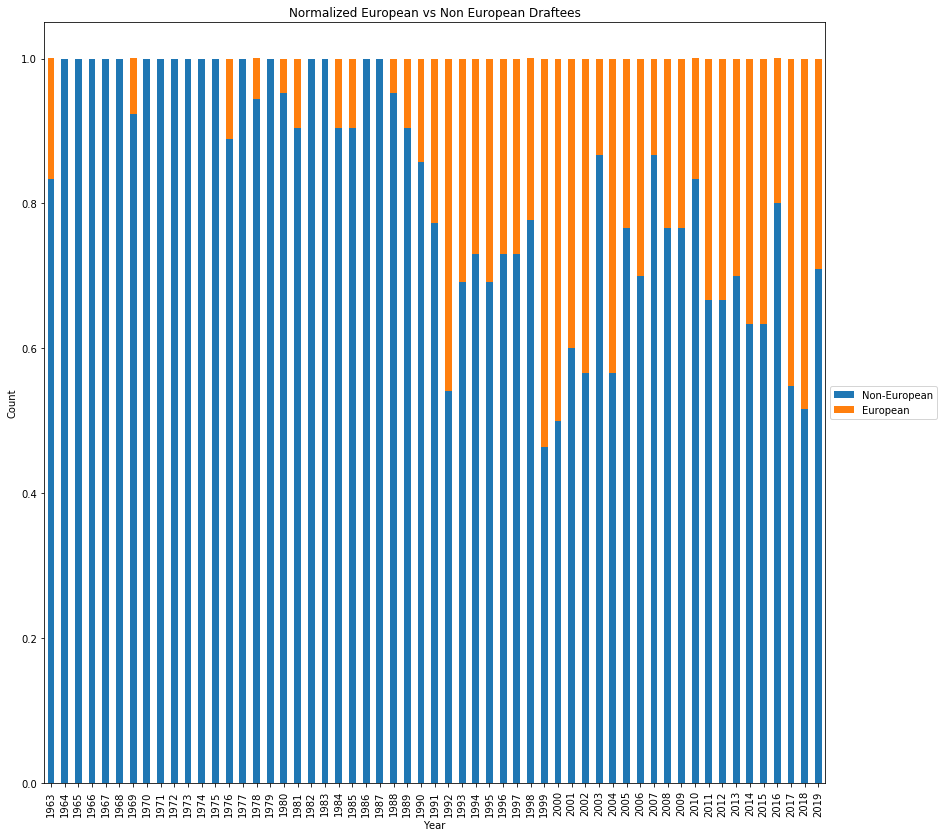

In [19]:
df = pd.DataFrame({'Non-European': non_euro, 'European': euro})
normal_df = df.div(data.sum(axis=1), axis=0)
normal_df.plot.bar(stacked=True, figsize=(14,14))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Normalized European vs Non European Draftees")
plt.show()

In [20]:
years = np.array(draft_data['Year'].drop_duplicates())
years = years.reshape(-1, 1)
euro_model = LinearRegression().fit(years, euro)
euro_model_slope = float(euro_model.coef_)
print("Slope for model of European draftees:", euro_model_slope)
print("R squared Score for this model", euro_model.score(years, euro))
print("")
non_euro_model = LinearRegression().fit(years, non_euro)
non_euro_model_slope = float(non_euro_model.coef_)
print("Slope for model of Non European draftees:", non_euro_model_slope)
print("R squared Score for this model", non_euro_model.score(years, non_euro))
print("")
normal_euro_model = LinearRegression().fit(years, normal_df['European'])
normal_euro_slope = float(normal_euro_model.coef_)
print("Slope for model of Normalized European draftees:", normal_euro_slope)
print("R squared Score for this model", normal_euro_model.score(years, normal_df['European']))
print("")
normal_non_euro_model = LinearRegression().fit(years, normal_df['Non-European'])
normal_non_euro_slope = float(normal_non_euro_model.coef_)
print("Slope for model of Normalized Non-European draftees:", normal_non_euro_slope)
print("R squared Score for this model", normal_non_euro_model.score(years, normal_df['Non-European']))

Slope for model of European draftees: 0.24027741768213637
R squared Score for this model 0.653045612250692

Slope for model of Non European draftees: 0.18414570910033706
R squared Score for this model 0.4163409429043505

Slope for model of Normalized European draftees: 0.0075930428802145076
R squared Score for this model 0.5821621853299626

Slope for model of Normalized Non-European draftees: -0.0075930428802145076
R squared Score for this model 0.5821621853299626


For explaining this significance of data, using both original data and then the normalized set of data is neccessary. This is because over time there has been an increase in number of drafts per year as more teams are added to the NHL. Just looking at the original data slopes would show that the both Non-European and European datasets have an increase of around 0.5 players drafted per year with a marginally high R squared score. <br><br>

But then once the data is normalized we see the increase in European draftees increasing while Non-European decreasing. The value of the slopes for the normal data is so small because the data is out of 1.0 for each row. Moreover, there is an R^2 value of 0.58 which gives more confidence with the validiy of the claim that more Europeans are joining the league. <br><br>

An interesting note to add would be that looking at the graph of normalized draftee counts per country, there is a linearly negative slope for Canadians meaning less are drafted each year. With that comes an increase in Americans and Europeans. There is greater influence from other countries today than there was in the 1960s - 1980s where Canadians were the overwhelming majority of those drafted. 

## Evaluation of Significance - Playstyle Data

slope: 0.003117461766680108
R squared value: 0.11020657891181207
slope: 0.0017001216492994367
R squared value: 0.01905340833024438


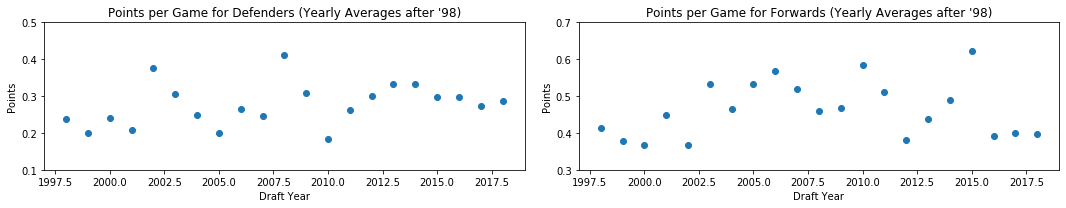

In [21]:
after_98 = playstyle_means.loc[playstyle_means["Year"] >= 1998]
after_98
f, axs = plt.subplots(2,1,figsize=(15,3))

year_a = np.array(after_98["Year"]).reshape(-1,1)
def_a = np.array(after_98["Mean-Points-Defenders"]).reshape(-1,1)
def_model_a = LinearRegression().fit(year_a,def_a)
def_slope_a = float(def_model_a.coef_)
print("slope:",def_slope_a)
r_sq_a = float(def_model_a.score(year_a,def_a))
print("R squared value:", r_sq_a)

f_a = np.array(after_98["Mean-Points-Forwards"]).reshape(-1,1)
f_model_a = LinearRegression().fit(year_a,f_a)
f_slope_a = float(f_model_a.coef_)
print("slope:",f_slope_a)
r_sq_a = float(f_model_a.score(year_a,f_a))
print("R squared value:", r_sq_a)

plt.subplot(1,2,1)
plt.scatter(after_98['Year'], after_98['Mean-Points-Defenders'])
plt.ylim(0.1, 0.5)
plt.title("Points per Game for Defenders (Yearly Averages after '98)")
plt.xlabel("Draft Year")
plt.ylabel("Points")

plt.subplot(1,2,2)
plt.scatter(after_98['Year'], after_98['Mean-Points-Forwards'])
plt.ylim(0.3, 0.7)
plt.title("Points per Game for Forwards (Yearly Averages after '98)")
plt.xlabel("Draft Year")
plt.ylabel("Points")
plt.tight_layout()
plt.show()

While we initially considered running these tests against randomized data, the linear regression calculations are so insignificant that it is not worth continuing this analysis, as the r-squared values are extremely low and the slopes are nearly zero. We cannot create any sort of conclusion from this set of data, and it is not worth further evaluating the significance. Draft picks do not indicate a change of playstyle with regards to points and shots. If we were to continue this on a broader scale, and not just draft picks, the next step would be to look at league trends in their entirety.

# V. Conclusion
--------------

Our initial hypothesis was the there would be a steady decrease in player size from 1963-2019, however we actually observed a positive correlation from 1970-1988 and then a negative correlation from 1998-2019. In our hypothesis test, we observed that these trends were not due to random chance. It is unlikely that the size of players will go any lower due to the average size of males, and focus on health and nutrition. It is possible that we are reaching an optimal size. 

To understand further how the game has changed over time, we observed that as the size of the game decreased the number of Europeans who entered the league rapidly increased. We hypothesized that the shot percentage of players and points per game would have increased, however, there was no observable trend. We also figured that the role for different positions would have changed. For instance, we thought that defenseman would have started to play more offensively, and score more points. Again, however, there was no observable trend.

When analyzing the points, it is possible that there was no significant trend, because players who were drafted more recently likely do not have as much ice times as veterans drafted before them. This would reduce the likelihood for players to get points in a game. 

In conclusion, we observed significant decrease in the size of players since 1998, which occurred concurrently with the increase in non-North American draft picks. This suggests that teams and coaches began to favor smaller players for their top picks. We did not find conclusive evidence that the game has become more skilled in terms of shot percentages and points per game. 

It is also possible that we did not observe these trends because players are becoming more skilled in unison. Therefore, goalies are also saving more shots, and defensemen are defending their zone better. 

If we were to continue this study in order to gain a better understanding of the skill of the game has increased, we would collect data on things like shot placement rather than a shot percentage. New stick technology has allowed players to place the puck more accurately around the net. This data is available, however difficult to scrape. It would have also been interesting to compare the first-round draft pick data to data from the entire league to see if there was a more negatively correlated trend in weight for the first-round draft picks than the entire league. 

# VI. Source Code
--------------

[Link to our Github](https://github.com/jbgolds/INFO2950)

# VII. Acknowledgements

Alec, one of our group members, has a deep interest in hockey, and has been playing it his entire life. His interest prompted this unique project idea in the first place, and help make sense to the types of analyses we conducted. 

The NHL website is very rich in data and very easy to navigate, and leaving means for us to scrape their website. The multiple sources the provided allowed us to create a data-dense csv to base everything off of. 

## VIII. Player Shot Myth (Fun Fact)

When hockey players first put on skates and pick up a stick, coaches, dads or moms are advised to give the kid a stick that shoots the opposite of what his/her dominant hand is. For instance if I am right handed I should shoot left. They say this because the top hand is used for controlling the puck, stick handling and shot accuracy. 

According to Europeans and Canadians, Americans arent aware of this and instead buy their kid a hockey stick that matches their dominant hand. By the time the kid is old enough to realize this, they have already become acustomed using that shot and it is too late to switch. 

In the analysis below we see that 64 percent of first round NHlers from anywhere in the world except the U.S. shoot lefty. Only 56 percent from the U.S. shoot lefty. This analysis would be more accurate if we had data for all players in the NHL.

While this data is inconclusive it is interesting to look at because the premise of this project was to assess how the game has changed over time. As more Europeans have entered the league, there has been a shift to a more skilled game rather than a physical one. Using a left handed stick when you are a righty means that you are focusing on stick handline and accuracy, the skill part of the game, while using a right handed stick as a righty means you are looking to get more power in your shot. 

Again, this is just a myth that hockey players hear, but we would need to also compare this data to whether the player was left or right handed. 

FYI: Alec is right handed, shoots right handed, and grew up playing hockey in the U.S.

In [22]:
player_shot=draft_data[draft_data["Shoots"] != ""]
player_shot_us = player_shot[player_shot["Country"] == "USA"]
player_shot_us_left = player_shot_us[player_shot_us["Shoots"] == "Left"]
player_shot_us_left

player_shot_row = player_shot[player_shot["Country"] != "USA"]
player_shot_row_left = player_shot_row[player_shot_row["Shoots"] == "Left"]

print("Percentage of first round NHLers who shoot left from ROW", len(player_shot_row_left.index)/len(player_shot_row.index))
print()
print("Percentage of first round NHLers who shoot left from the U.S.", len(player_shot_us_left.index)/len(player_shot_us.index))

Percentage of first round NHLers who shoot left from ROW 0.6426799007444168

Percentage of first round NHLers who shoot left from the U.S. 0.569620253164557
